<a href="https://colab.research.google.com/github/rzunick/Dominant-Color-Detection/blob/main/COCO_Color_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from zipfile import ZipFile
import os
import shutil
import matplotlib.pyplot as plt

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import  glob

import os
import  numpy as np
import pandas as pd

import random
from PIL import Image

import logging

# Sample Dataset

In [3]:
# URL of the .zip file in the GitHub repository
github_zip_url = "https://github.com/rzunick/Dominant-Color-Detection/raw/main/coco_color_sample_balanced.zip?download="

# Define the path where you want to create the new folder
new_folder_path = '/content/coco_color_sample'

# Create the new folder
os.makedirs(new_folder_path, exist_ok=True)

# Path to save the downloaded .zip file
zip_file_path = '/content/coco_color_sample_balanced.zip'

# Download the .zip file from GitHub
response = requests.get(github_zip_url)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

# Verify the download
if response.status_code == 200:
    print("File downloaded successfully")
else:
    print("Failed to download file")

File downloaded successfully


In [4]:
# Confirmar tipo de archivo es tipo .zip
!file /content/coco_color_sample_balanced.zip

/content/coco_color_sample_balanced.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [5]:
# Specify the directory where you want to extract the files
extract_to_directory = '/content/coco_color_sample/'

# Create a ZipFile object
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(extract_to_directory)

# Dataset Path
path = '/content/coco_color_sample'

In [6]:
# Configuration 1: 10 labels
labels = ["Red","Yellow","Blue","Orange","Green","Purple","Black","White","Gray","Pink"]

def decode_label(index):
    return  labels[index]

def encode_label_from_path(path):
    for index,value in enumerate(labels):
        if value in path:
            return  index

In [7]:
# Get image list
image_list = glob.glob(os.path.join(path, '**', '*.*'), recursive=True)
class_list = [encode_label_from_path(item) for item in image_list]

In [8]:
# Count the number of images per class
from collections import Counter
label_counts = Counter(class_list)
print("Label counts:", label_counts)

Label counts: Counter({7: 12, 2: 12, 0: 12, 3: 12, 4: 12, 8: 12, 6: 12, 5: 12, 1: 12, 9: 12})


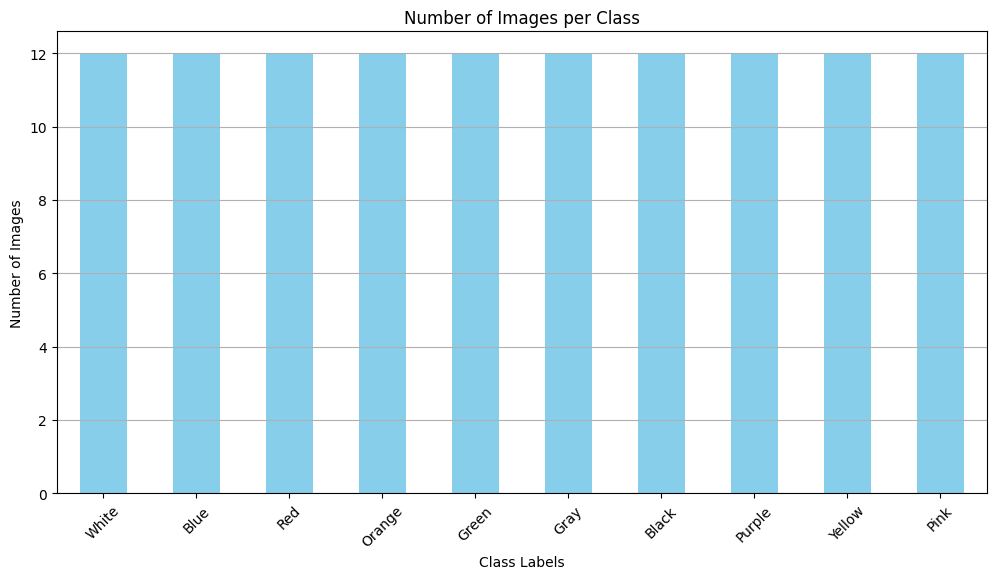

In [9]:
# Convert the counter to a pandas DataFrame
label_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count'])
label_df.index = [labels[idx] for idx in label_df.index]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
label_df['count'].plot(kind='bar', color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

In [15]:
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size  # Returns (width, height)

# List to store image sizes
image_sizes = []

# Iterate through all images
for img_path in image_list:
    try:
        size = get_image_size(img_path)
        image_sizes.append(size)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Calculate average width and height
if image_sizes:
    avg_width = sum(size[0] for size in image_sizes) / len(image_sizes)
    avg_height = sum(size[1] for size in image_sizes) / len(image_sizes)

    print(f"Average image size: {avg_width:.2f} x {avg_height:.2f} pixels")
    print(f"Total number of images processed: {len(image_sizes)}")
else:
    print("No images were successfully processed.")

Average image size: 224.00 x 224.00 pixels
Total number of images processed: 120


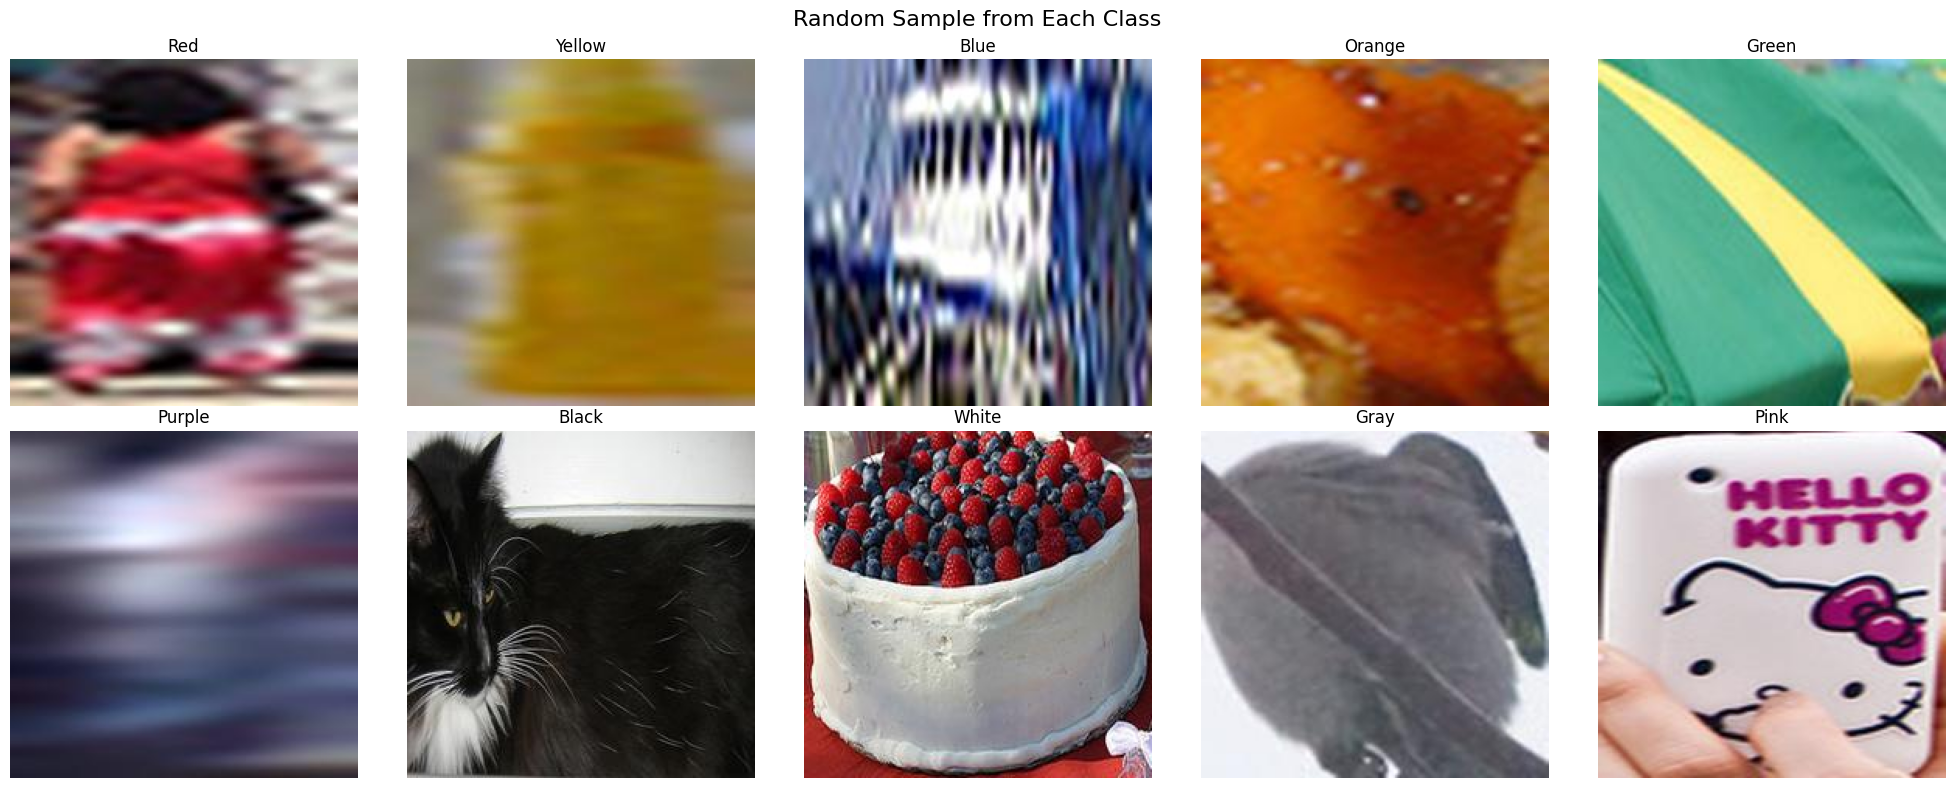

In [12]:
# Function to get a random image path for a given label
def get_random_image_for_label(label):
    label_images = [img for img, cls in zip(image_list, class_list) if cls == labels.index(label)]
    return random.choice(label_images) if label_images else None

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Random Sample from Each Class", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each label
for i, label in enumerate(labels):
    # Get a random image path for the current label
    img_path = get_random_image_for_label(label)

    if img_path:
        # Open and display the image
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"{label}")
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f"No image for {label}", ha='center', va='center')
        axes[i].axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Full Dataset

In [16]:
# URL of the .zip file in the GitHub repository
github_zip_url = "https://github.com/rzunick/Dominant-Color-Detection/raw/main/coco_color_full_2.zip?download="

# Define the path where you want to create the new folder
new_folder_path = '/content/coco_color_full'

# Create the new folder
os.makedirs(new_folder_path, exist_ok=True)

# Path to save the downloaded .zip file
zip_file_path = '/content/coco_color_full_2.zip'

# Download the .zip file from GitHub
response = requests.get(github_zip_url)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

# Verify the download
if response.status_code == 200:
    print("File downloaded successfully")
else:
    print("Failed to download file")

File downloaded successfully


In [17]:
# Confirmar tipo de archivo es tipo .zip
!file /content/coco_color_full_2.zip

/content/coco_color_full_2.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [18]:
# Specify the directory where you want to extract the files
extract_to_directory = '/content/coco_color_full'

# Create a ZipFile object
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(extract_to_directory)

In [19]:
# Dataset Path
path = '/content/coco_color_full'

In [20]:
# Get image list
image_list = glob.glob(os.path.join(path, '**', '*.*'), recursive=True)
class_list = [encode_label_from_path(item) for item in image_list]

In [21]:
# Count the number of images per class
from collections import Counter
label_counts = Counter(class_list)
print("Label counts:", label_counts)

Label counts: Counter({7: 8975, 2: 8975, 0: 8975, 3: 8975, 4: 8975, 8: 8975, 6: 8975, 5: 8975, 1: 8975, 9: 8975})


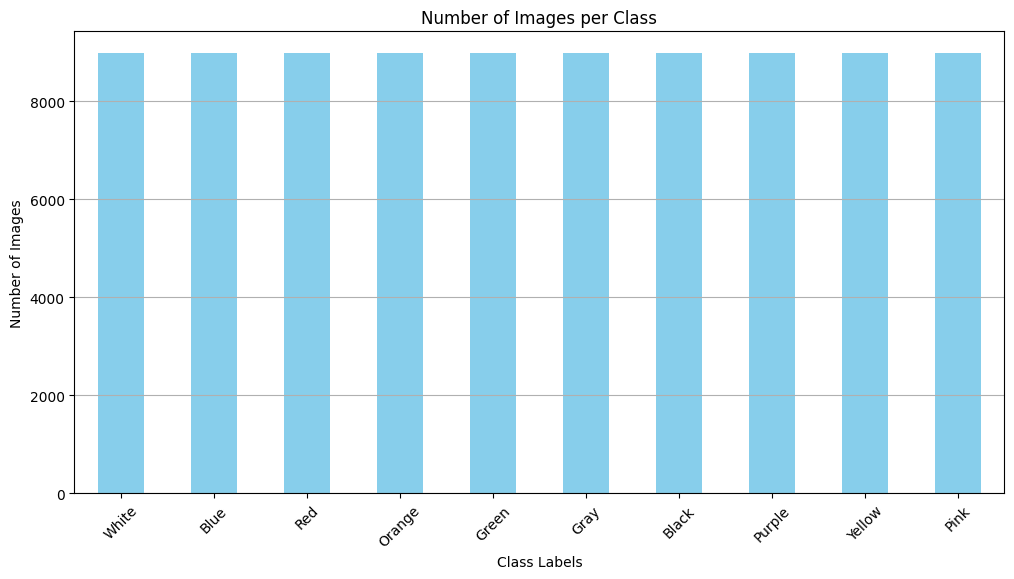

In [22]:
# Convert the counter to a pandas DataFrame
label_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count'])
label_df.index = [labels[idx] for idx in label_df.index]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
label_df['count'].plot(kind='bar', color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

In [24]:
# List to store image sizes
image_sizes = []

# Iterate through all images
for img_path in image_list:
    try:
        size = get_image_size(img_path)
        image_sizes.append(size)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Calculate average width and height
if image_sizes:
    avg_width = sum(size[0] for size in image_sizes) / len(image_sizes)
    avg_height = sum(size[1] for size in image_sizes) / len(image_sizes)

    print(f"Average image size: {avg_width:.2f} x {avg_height:.2f} pixels")
    print(f"Total number of images processed: {len(image_sizes)}")
else:
    print("No images were successfully processed.")

Average image size: 224.00 x 224.00 pixels
Total number of images processed: 89750


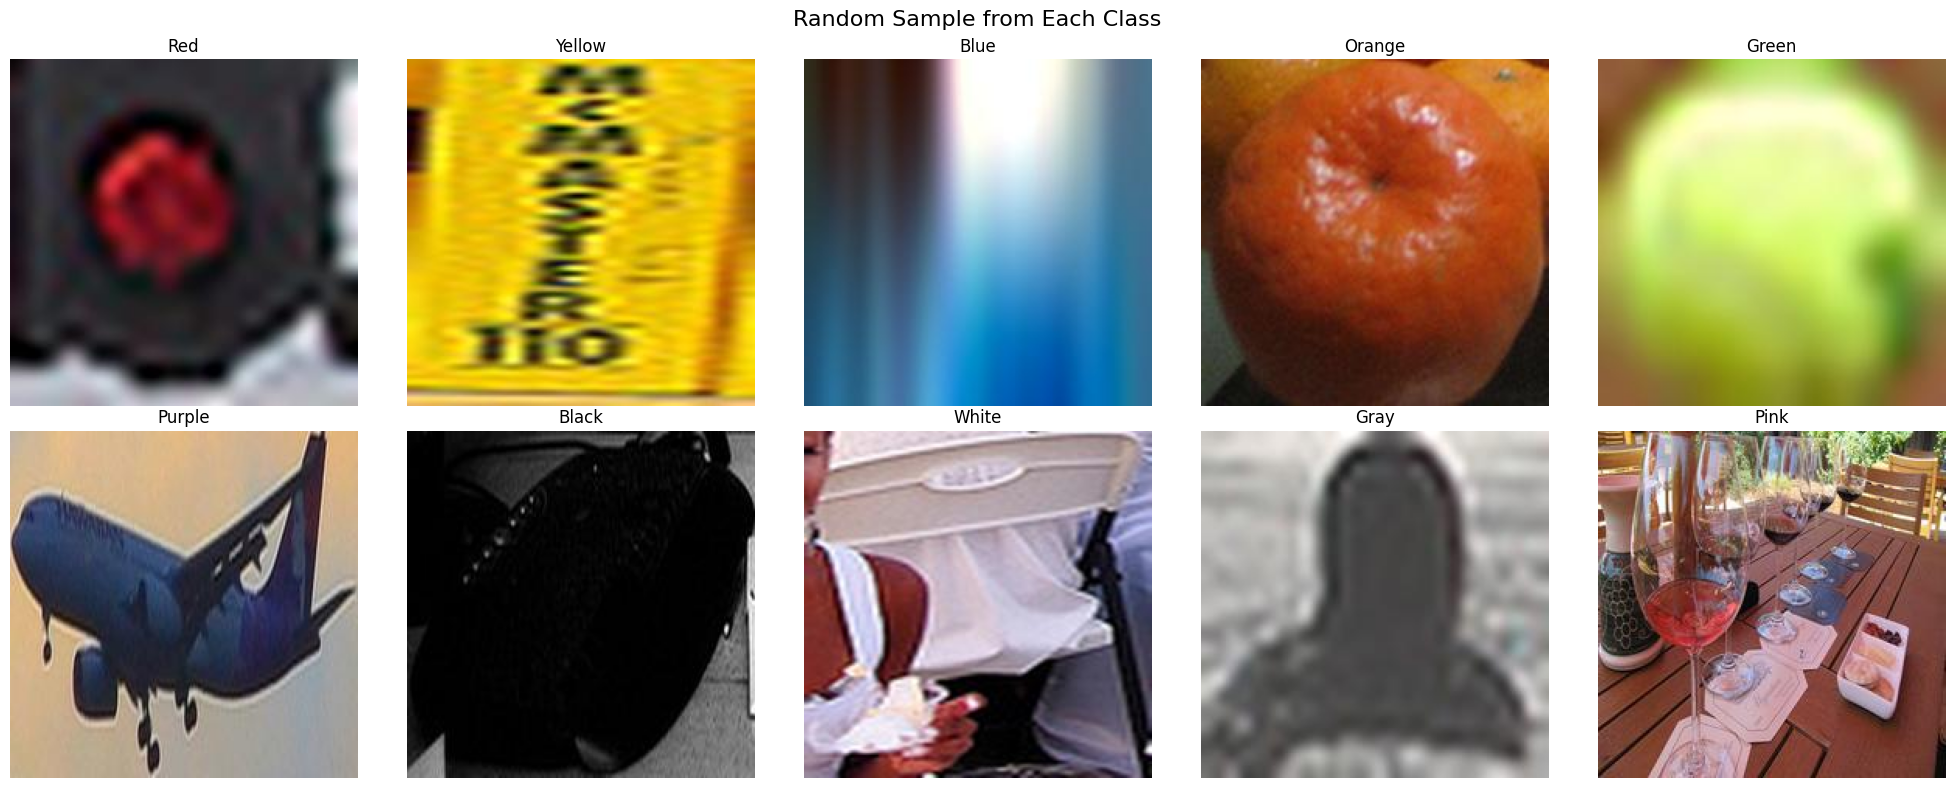

In [25]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Random Sample from Each Class", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each label
for i, label in enumerate(labels):
    # Get a random image path for the current label
    img_path = get_random_image_for_label(label)

    if img_path:
        # Open and display the image
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"{label}")
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f"No image for {label}", ha='center', va='center')
        axes[i].axis('off')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()